<a href="https://colab.research.google.com/github/Sudeep4021/Time-Series-Project/blob/master/Predice_el_futuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import  matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

#ACF aand PACF
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_dataset = pd.read_csv('https://github.com/Sudeep4021/Time-Series-Project/blob/master/TimeSeries%20Project/train_csv.csv',index_col = 'time', parse_dates = True)
test_dataset = pd.read_csv('https://github.com/Sudeep4021/Time-Series-Project/blob/master/TimeSeries%20Project/test_csv.csv')

HTTPError: ignored

In [0]:
train_dataset.head(10)
train_dataset.index.freq = '10s'

So in this dataset 80 records and three columns. The data represents the
number of features every 10 seconds on 3rd of March 2019

**id column does not provide any insight show lets remove it**

In [0]:
train_dataset.drop(['id'], axis = 1, inplace= True)
test_dataset.drop(['id'], axis = 1, inplace= True)

In [0]:
#train_dataset['seconds'] = pd.to_datetime(pd.Series(train_dataset['time'])).dt.strftime('%S')

In [0]:
#Convert normal indes to DateTimeIndex
train_dataset.index = pd.to_datetime(pd.Series(train_dataset.index))
train_dataset.index

DatetimeIndex(['2019-03-19 00:00:00', '2019-03-19 00:00:10',
               '2019-03-19 00:00:20', '2019-03-19 00:00:30',
               '2019-03-19 00:00:40', '2019-03-19 00:00:50',
               '2019-03-19 00:01:00', '2019-03-19 00:01:10',
               '2019-03-19 00:01:20', '2019-03-19 00:01:30',
               '2019-03-19 00:01:40', '2019-03-19 00:01:50',
               '2019-03-19 00:02:00', '2019-03-19 00:02:10',
               '2019-03-19 00:02:20', '2019-03-19 00:02:30',
               '2019-03-19 00:02:40', '2019-03-19 00:02:50',
               '2019-03-19 00:03:00', '2019-03-19 00:03:10',
               '2019-03-19 00:03:20', '2019-03-19 00:03:30',
               '2019-03-19 00:03:40', '2019-03-19 00:03:50',
               '2019-03-19 00:04:00', '2019-03-19 00:04:10',
               '2019-03-19 00:04:20', '2019-03-19 00:04:30',
               '2019-03-19 00:04:40', '2019-03-19 00:04:50',
               '2019-03-19 00:05:00', '2019-03-19 00:05:10',
               '2019-03-

# Plot the source data

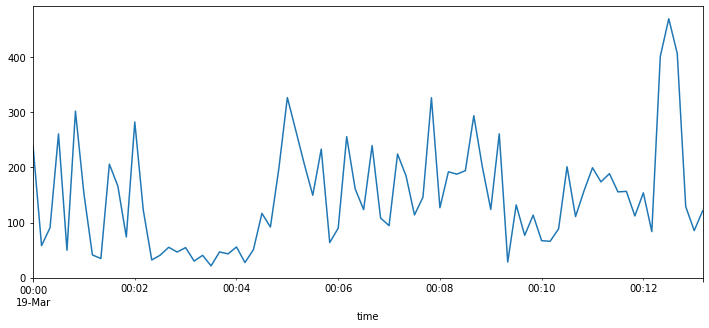

In [0]:
train_dataset['feature'].plot(figsize = (12,5));

# Using Statsmodel for checking for trends

In [0]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [0]:
features_cycle, features_trend = hpfilter(train_dataset['feature'], lamb = 1600)

In [0]:
type(features_trend)

pandas.core.series.Series

In [0]:
train_dataset['trend'] = features_trend

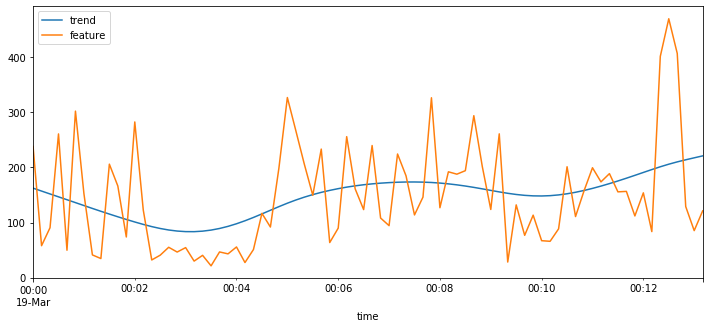

In [0]:
train_dataset[['trend', 'feature']].plot(figsize = (12, 5));

# ACF aand PACF

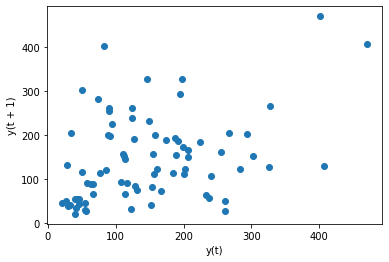

In [0]:
lag_plot(train_dataset['feature'])

**So it is a Stationary Data**

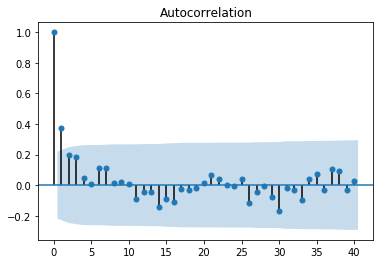

In [0]:
plot_acf(train_dataset['feature'], lags = 40);

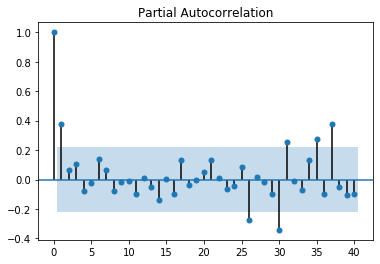

In [0]:
plot_pacf(train_dataset['feature'], lags= 40);

# Lets Run an ETS Decomposition

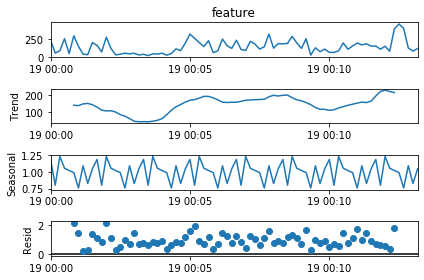

In [0]:
result = seasonal_decompose(train_dataset['feature'], period= 10, model = 'mul')
result.plot();

**Lets Run pmdarima.auto_arima to obtain recommended orders**

In [0]:
auto_arima(train_dataset['feature'], seasonal=True, m = 10).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -472.785
Date:                Fri, 12 Jun 2020   AIC                            951.571
Time:                        14:04:25   BIC                            958.717
Sample:                             0   HQIC                           954.436
                                 - 80                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     90.7906     19.359      4.690      0.000      52.848     128.734
ar.L1          0.3832      0.084      4.558      0.000       0.218       0.548
sigma2      7950.6557   1416.023      5.615      0.000    5175.302    1.07e+04
===================================================================================
Ljung-Box (Q):                       29.96   Jarque-Bera (JB):                10.21
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                             0.86
Prob(H) (two-sided):                  0.91   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Split the data into train/test sets

In [0]:
#train = train_dataset.iloc[:len(train_dataset)-50]
#test = train_dataset.iloc[len(train_dataset)-50:]

#Splitting data to Test:Train
train = train_dataset[0:int(len(train_dataset)*0.7)]
test = train_dataset[int(len(train_dataset)*0.7):]

In [0]:
print("train ",train.shape, "test ",test.shape)

train  (56, 1) test  (24, 1)


**Fit a SARIMAX(1, 0, 0) model to the training set**

In [0]:
model = SARIMAX(train_dataset['feature'], order=(1,1,0)) #Chosen this combination of p,q,d
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                feature   No. Observations:                   80
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -476.656
Date:                Fri, 12 Jun 2020   AIC                            957.311
Time:                        14:33:40   BIC                            962.050
Sample:                    03-19-2019   HQIC                           959.210
                         - 03-19-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3528      0.092     -3.843      0.000      -0.533      -0.173
sigma2      1.018e+04   1408.294      7.228      0.000    7419.444    1.29e+04
===================================================================================
Ljung-Box (Q):                       48.17   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.18   Prob(JB):                         0.33
Heteroskedasticity (H):               1.26   Skew:                             0.24
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Obtain Predicted Values

In [0]:
start = len(train)
end = len(train) + len(test) -1

In [0]:
predictions = results.predict(start, end, typ = 'levels').rename('SARIMA Test Predictions')

# Plot predictions against known values

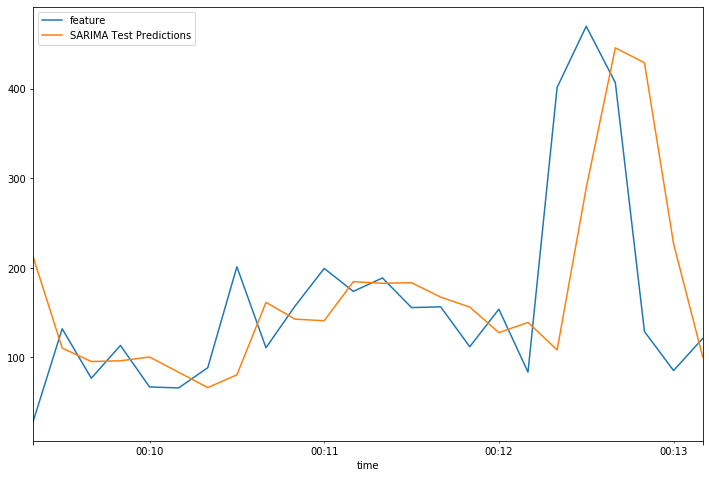

In [0]:
test['feature'].plot(figsize = (12, 8), legend = True)
predictions.plot(legend = True);

# Evaluate the Model using MSE and RMSE

In [0]:
rmse(test['feature'], predictions)

110.86891590673693

In [0]:
mean_squared_error(test['feature'], predictions)

12291.916514335104

**Retrain the model on the full data and forecast one min into future**

In [0]:
model = SARIMAX(train_dataset['feature'], order=(1,1,0))
results = model.fit()
fcast = results.predict(start=len(train_dataset), end =len(train_dataset)+60, typ = 'levels').rename('SARIMA Forecast')

**Plot the forecasted values alongside the orginal data**

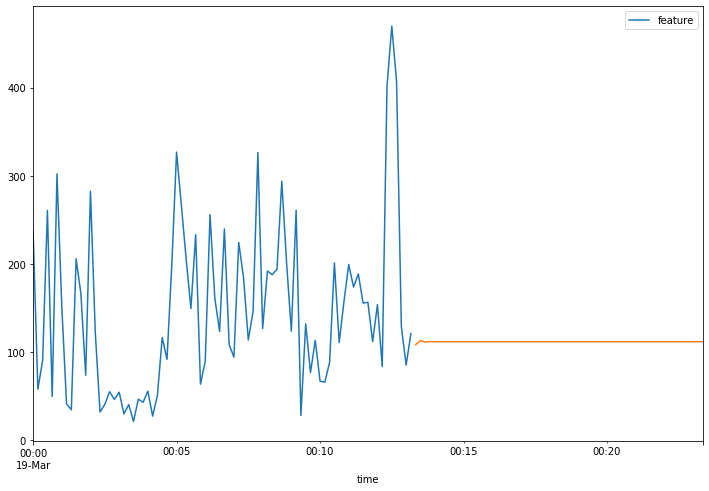

In [0]:
train_dataset['feature'].plot(figsize = (12, 8), legend = True)
fcast.plot()

**As we can see there is no deviation and also not a good fit**

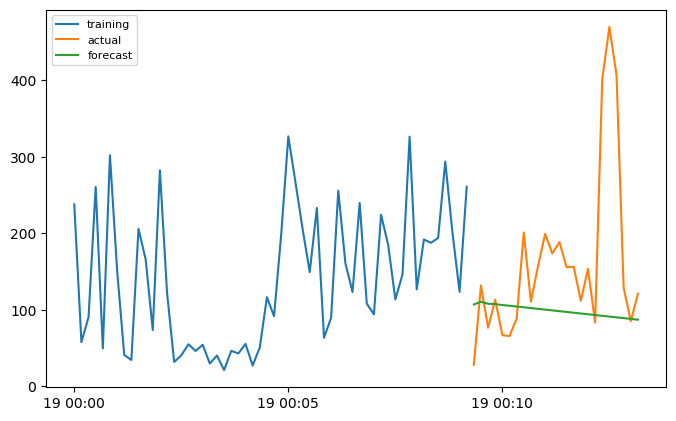

In [0]:
# so lets try with ARIMA model

model = ARIMA(train_dataset['feature'], order=(1, 1, 0))  
fit_model = model.fit()  

fc, se, conf = fit_model.forecast(24, alpha=0.05)  

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

plt.figure(figsize=(8,5), dpi=100)
plt.plot(train['feature'], label='training')
plt.plot(test['feature'], label='actual')
plt.plot(fc_series, label='forecast')

plt.legend(loc='upper left', fontsize=8)
plt.show()


**This is better to forecast**

In [0]:
forecast = fit_model.forecast(steps=40)[0]
test_dataset['forecast'] = forecast

#Save to csv
test_dataset.to_csv("Solution.xlsx")

In [0]:
test_dataset.head()

,time,forecast
0,2019-03-19 00:13:20,107.123681
1,2019-03-19 00:13:30,110.689845
2,2019-03-19 00:13:40,108.066932
3,2019-03-19 00:13:50,107.625070
4,2019-03-19 00:14:00,106.414598
